In [1]:
import torch
import glob
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = ['5 Layer UNet (base)','5 Layer UNet with Aug']

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
def get_recent_checkpoint(dir_path, idx=0, ):
    paths = glob.glob(dir_path+'/*')
    
    if len(paths)==0:
        print('UUID not found')
        return None, None
    
    a = []
    
    for path in paths:
        data_file = path.split('/')[-1]
        epoch = re.findall(r'\d+', data_file)
        a.append(int(epoch[0]))
   
    if len(a)>0:
        recent_epoch = sorted(a, reverse=True)[idx]
    else:
        return None, None
   
    return recent_epoch, f'{dir_path}/data_{recent_epoch}.pkl'

In [5]:
idx, checkpoint_path = get_recent_checkpoint(dir_path='/kaggle/input/patch-small-cp/1d8cf009-8c1b-4f4b-9ba4-42079b1bbbe2', idx=0)

print("No checkpoint found" if checkpoint_path == None else "Checkpoint found")
print(idx, checkpoint_path)

checkpoint_data = None

if checkpoint_path!=None:

    best_checkpoint_data = torch.load(checkpoint_path, map_location=device)

    config = best_checkpoint_data['config']
    
    exclude_list = ['config', 'net_state_dict', 'optimizer_state_dict']
    
    checkpoint_data = {}
    
    for i in best_checkpoint_data.keys():
        if i not in exclude_list:
            checkpoint_data[i] = best_checkpoint_data[i]

Checkpoint found
199 /kaggle/input/patch-small-cp/1d8cf009-8c1b-4f4b-9ba4-42079b1bbbe2/data_199.pkl


/tmp/ipykernel_17/2541577373.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_checkpoint_data = torch.load(checkpoint_path, map_location=device)


In [6]:
train_epoch_times_128 = checkpoint_data['train_epoch_times']
full_epoch_times_128 = checkpoint_data['full_epoch_times']

In [7]:
idx, checkpoint_path = get_recent_checkpoint(dir_path='/kaggle/input/patch-smodel-aug-cp/6103f738-9d8a-481a-86e4-a02f5bd55862', idx=0)

print("No checkpoint found" if checkpoint_path == None else "Checkpoint found")
print(idx, checkpoint_path)

checkpoint_data = None

if checkpoint_path!=None:

    best_checkpoint_data = torch.load(checkpoint_path, map_location=device)

    config = best_checkpoint_data['config']
    
    exclude_list = ['config', 'net_state_dict', 'optimizer_state_dict']
    
    checkpoint_data = {}
    
    for i in best_checkpoint_data.keys():
        if i not in exclude_list:
            checkpoint_data[i] = best_checkpoint_data[i]

Checkpoint found
199 /kaggle/input/patch-smodel-aug-cp/6103f738-9d8a-481a-86e4-a02f5bd55862/data_199.pkl


/tmp/ipykernel_17/3854831466.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_checkpoint_data = torch.load(checkpoint_path, map_location=device)


In [8]:
train_epoch_times_96 = checkpoint_data['train_epoch_times']
full_epoch_times_96 = checkpoint_data['full_epoch_times']

In [9]:
data = np.array([ abs(sum(full_epoch_times_128)), abs(sum(full_epoch_times_96))])/3600

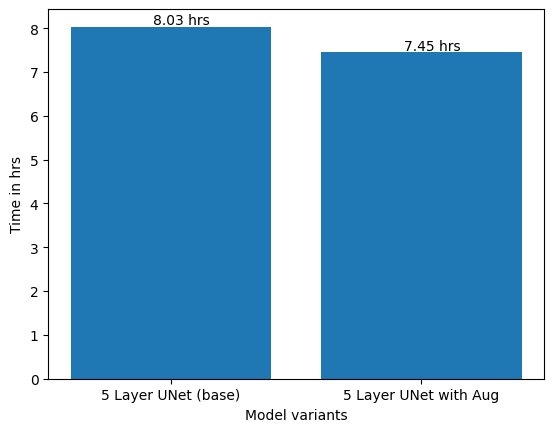

In [10]:
plt.bar(x=x,height=data)
plt.ylabel('Time in hrs')
plt.xlabel('Model variants')
for i in range(len(x)):
        plt.text(i-0.07,data[i]+0.05,f'{data[i]:.2f} hrs')

In [11]:
data = np.array([ abs(sum(train_epoch_times_128)), abs(sum(train_epoch_times_96))])/3600

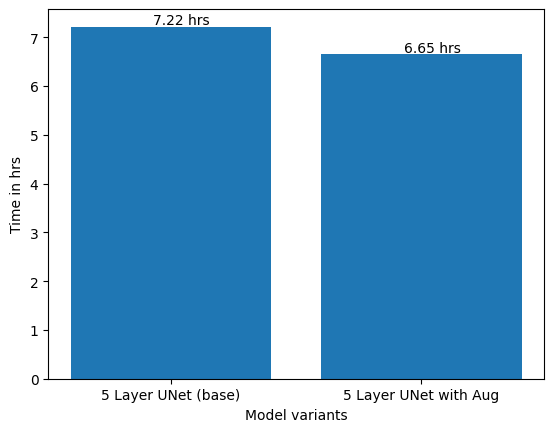

In [12]:
plt.bar(x=x,height=data)
plt.ylabel('Time in hrs')
plt.xlabel('Model variants')
for i in range(len(x)):
        plt.text(i-0.07,data[i]+0.05,f'{data[i]:.2f} hrs')